In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [7]:
df=pd.read_csv('../Data/Obesity.csv',sep=',',encoding='latin1')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [9]:
df.shape

(2111, 17)

In [10]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
#Arrendondando os valores das colunas 
df['FCVC']=df['FCVC'].round()
df['NCP']=df['NCP'].round()
df['CH2O']=df['CH2O'].round()
df['FAF']=df['FAF'].round()
df['TUE']=df['TUE'].round()
df['Age']=df['Age'].astype('int')
df['Height']=df['Height'].map(lambda x : f'{x:.2f}').astype('float')
df['Weight']=df['Weight'].map(lambda x : f'{x:.2f}').astype('float')

In [12]:
#Verificar se existem valores nulos

df.isna().sum().sum()

0

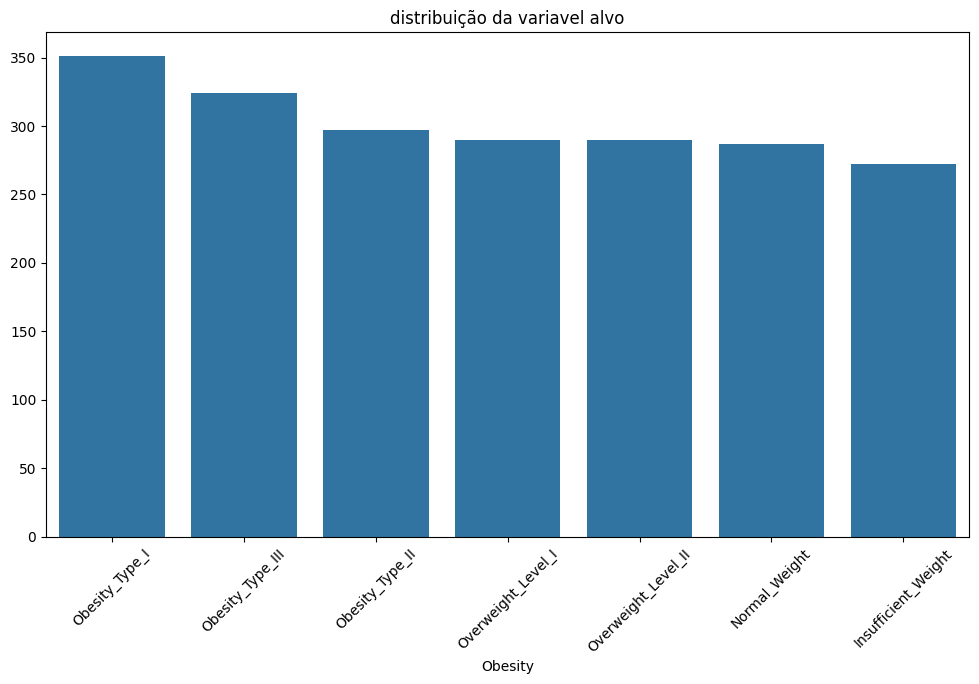

In [13]:
plt.figure(figsize=(10,6))

sns.barplot(x=df['Obesity'].value_counts().index,y=df['Obesity'].value_counts().values)
plt.title("distribuição da variavel alvo")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [14]:
x=df['Obesity'].value_counts(normalize=True)*100

In [15]:
variaveis_categoricas=df.select_dtypes(['object']).columns

In [16]:
#Agrupamento de family history por obesity
df_family_history=df.loc[df['family_history']=='yes'] 

df_agruped=df_family_history['Obesity'].value_counts(normalize=True).reset_index(name='Sim')
df_agruped['Sim']=df_agruped['Sim'].astype('float')
df_agruped.sort_values(by='Sim',ascending=False,inplace=True)
df_agruped['Sim']=df_agruped['Sim'].map(lambda x : f'{x:.1%}')
df_agruped

,Obesity,Sim
0,Obesity_Type_I,19.9%
1,Obesity_Type_III,18.8%
2,Obesity_Type_II,17.1%
3,Overweight_Level_II,15.8%
4,Overweight_Level_I,12.1%
5,Normal_Weight,9.0%
6,Insufficient_Weight,7.3%


In [17]:
#Agrupamento de family history por obesity
df_family_history=df.loc[df['family_history']=='no'] 

df_agruped=df_family_history['Obesity'].value_counts(normalize=True).reset_index(name='Não')
df_agruped['Não']=df_agruped['Não'].astype('float')
df_agruped.sort_values(by='Não',ascending=False,inplace=True)
df_agruped['Não']=df_agruped['Não'].map(lambda x : f'{x:.1%}')
df_agruped

,Obesity,Não
0,Insufficient_Weight,37.9%
1,Normal_Weight,34.3%
2,Overweight_Level_I,21.0%
3,Overweight_Level_II,4.7%
4,Obesity_Type_I,1.8%
5,Obesity_Type_II,0.3%


Nos casos onde possuem o histórico familiar, o maior volume está em obesidade tipo 1 com  apróx. 20% dos casos, somando os casos de obesidade no geral temos 55% dos casos


In [18]:
ordem_categorias = [
    'Insufficient_Weight', 
    'Normal_Weight', 
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'
]

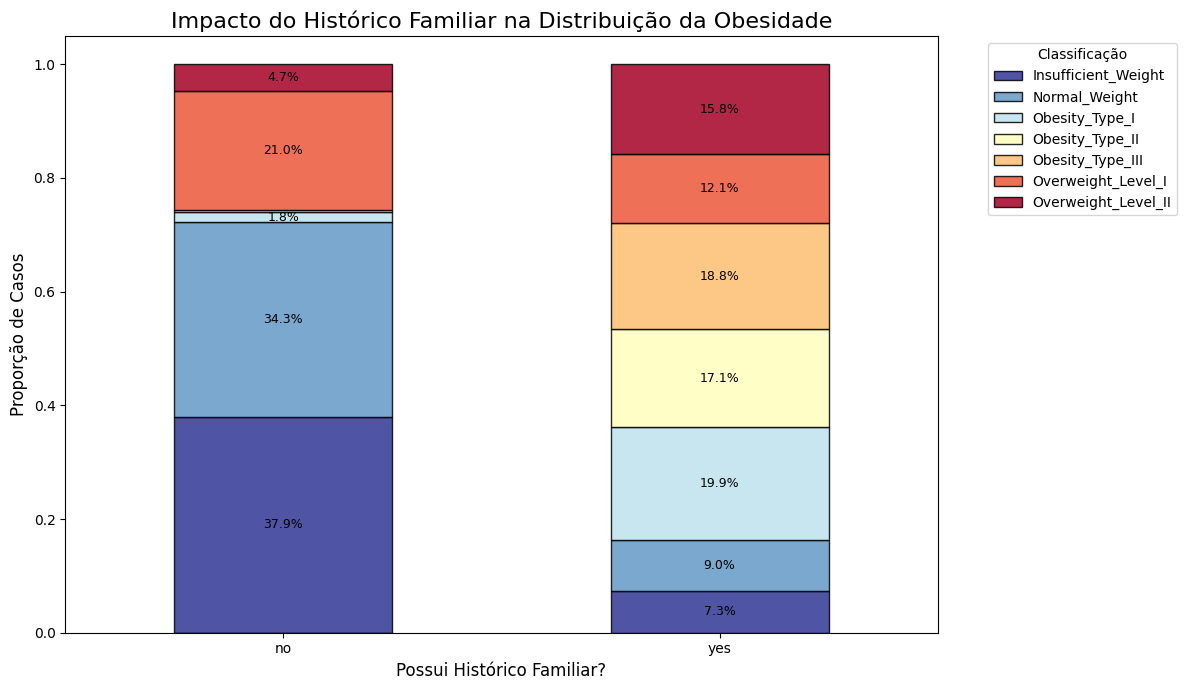

In [19]:
cross_tab = pd.crosstab(df['family_history'], df['Obesity'], normalize='index')

ax = cross_tab.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 7), 
    colormap='RdYlBu_r', 
    edgecolor='black',   
    alpha=0.85
)


plt.title('Impacto do Histórico Familiar na Distribuição da Obesidade', fontsize=16)
plt.xlabel('Possui Histórico Familiar?', fontsize=12)
plt.ylabel('Proporção de Casos', fontsize=12)
plt.xticks(rotation=0) 
plt.legend(title='Classificação', bbox_to_anchor=(1.05, 1), loc='upper left')


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab.loc[x], cross_tab.loc[x].cumsum()):
        
        if proportion > 0.01: 
            plt.text(x=n,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{proportion:.1%}', 
                     color="black",
                     fontsize=9,
                     ha="center", 
                     va="center")

plt.tight_layout()
plt.show()

Aqui conseguimos visualizar de forma mais completa a distribuição de nivel de obesidade por histórico Familiar

Olhando para a coluna `no` temos 72% que estão nas categorias 'peso normal ou baixo'

Curioso que quem não tem histórico familiar tem grandes chance de ter peso baixo, ou seja, não tem histórico, 38% de ter peso baixo 

Enquanto na coluna `yes` temos que as mesmas faixas de peso normal ou baixo, somam 16,3%

Olhando para as faixas obesity Type I e II da coluna `no` temos que para esse dataset é raro acontecerem sem ter histórico familiar





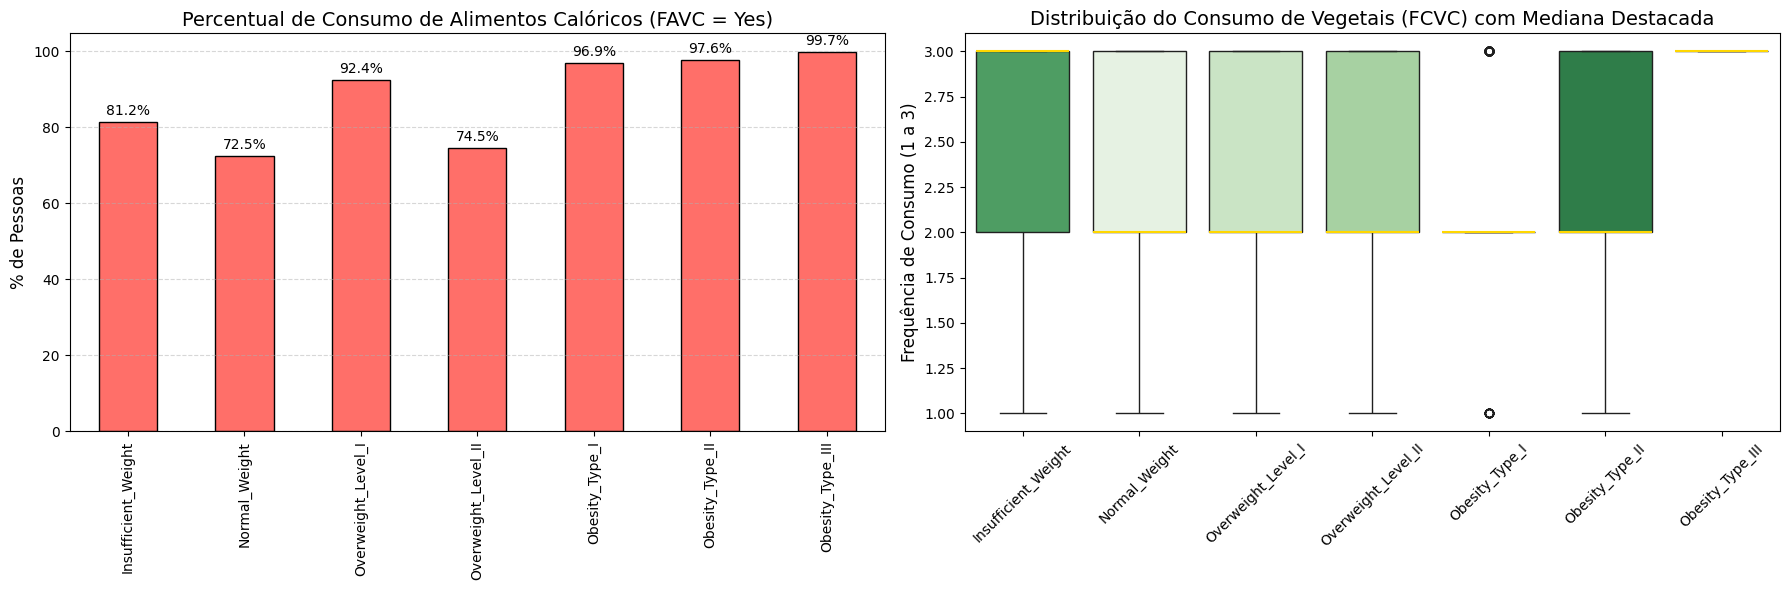

In [20]:

# 1. Definir a ordem lógica (Crucial para ver a progressão)
ordem_categorias = [
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
]

# Configurar a área de plotagem (2 gráficos lado a lado)
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# --- GRÁFICO 1: Consumo de Alimentos Calóricos (FAVC) ---
# Vamos calcular a % de pessoas que responderam "yes" para FAVC em cada grupo
favc_percent = pd.crosstab(df['Obesity'], df['FAVC'], normalize='index')['yes'] * 100

# Reordenar e plotar
favc_percent = favc_percent.reindex(ordem_categorias)
bars = favc_percent.plot(kind='bar', color='#ff6f69', ax=ax[0], edgecolor='black')

ax[0].set_title('Percentual de Consumo de Alimentos Calóricos (FAVC = Yes)', fontsize=14)
ax[0].set_ylabel('% de Pessoas', fontsize=12)
ax[0].set_xlabel('')
ax[0].grid(axis='y', linestyle='--', alpha=0.5)

# Adicionar rótulos nas barras
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.1f%%', padding=3)

# --- GRÁFICO 2: Consumo de Vegetais (FCVC) ---
# Boxplot para ver a mediana e a dispersão dos dados (1 = pouco, 3 = muito)
sns.boxplot(
    data=df, 
    x='Obesity', 
    y='FCVC', 
    order=ordem_categorias, 
    ax=ax[1], 
    palette='Greens',
    hue='Obesity',
    medianprops={"color": "gold", "linewidth": 1.5}
)

ax[1].set_title('Distribuição do Consumo de Vegetais (FCVC) com Mediana Destacada', fontsize=14)
ax[1].set_ylabel('Frequência de Consumo (1 a 3)', fontsize=12)
ax[1].set_xlabel('')
ax[1].tick_params(axis='x', rotation=45) # Rotacionar rótulos para leitura

plt.tight_layout()
plt.show()

Nesta visualização mostra o quanto os grupos comem de alimentos caloricos e vegetais:

* Como observamos o grupo de obesidade nivel tres tem o maior indice de consumo de alimentos caloricos `FAVC` - 99.7% 
comparando com o grupo de peso normal cai para 72,5%  indicando que pessoas com peso normal tendem a consumir menos alimentos caloricos.

O grupo obesidade nivel três também apresenta uma frequencia de consumo de vegetais grande, então indicam que mantem uma dieta rica em hipercalóricos e rica em vegetais.

In [21]:
#FAF -> FISICAL ACTIVITY FREQUENCY
#TUE -> TIME USING TECHNOLOGY

df_agr_faf_tue=df.groupby('Obesity')[['FAF', 'TUE']].mean().sort_values(by='FAF')
df_agr_faf_tue.reset_index(inplace=True)
df_agr_faf_tue['FAF']=df_agr_faf_tue['FAF'].astype('float')
df_agr_faf_tue['TUE']=df_agr_faf_tue['TUE'].astype('float')
df_agr_faf_tue.sort_values(by='TUE',ascending=False)



,Obesity,FAF,TUE
5,Insufficient_Weight,1.246324,0.841912
1,Overweight_Level_II,0.962069,0.713793
2,Obesity_Type_I,0.974359,0.692308
6,Normal_Weight,1.247387,0.675958
0,Obesity_Type_III,0.635802,0.663580
4,Overweight_Level_I,1.068966,0.586207
3,Obesity_Type_II,0.979798,0.488215


Notamos que obesidade nivel três tem o menor indice de prática de atividade física disparado de 0.63 enquanto o minimo dos outros grupos é de 0.96

*Pessoas com peso normal se exercitam o dobro do que o nivel 3 de obsdd.

entendemos que para casos graves (nivel 3), essa disparidade em pratica de atividade fisica mostra-se como determinante

Nessa tabela vemos também que o uso de tecnologia não condiz com o tipo de obsdd, por conta de o grupo de peso baixo ficar cerca de 84% do tempo enquanto não há uma correlação direta com nível de obsdd


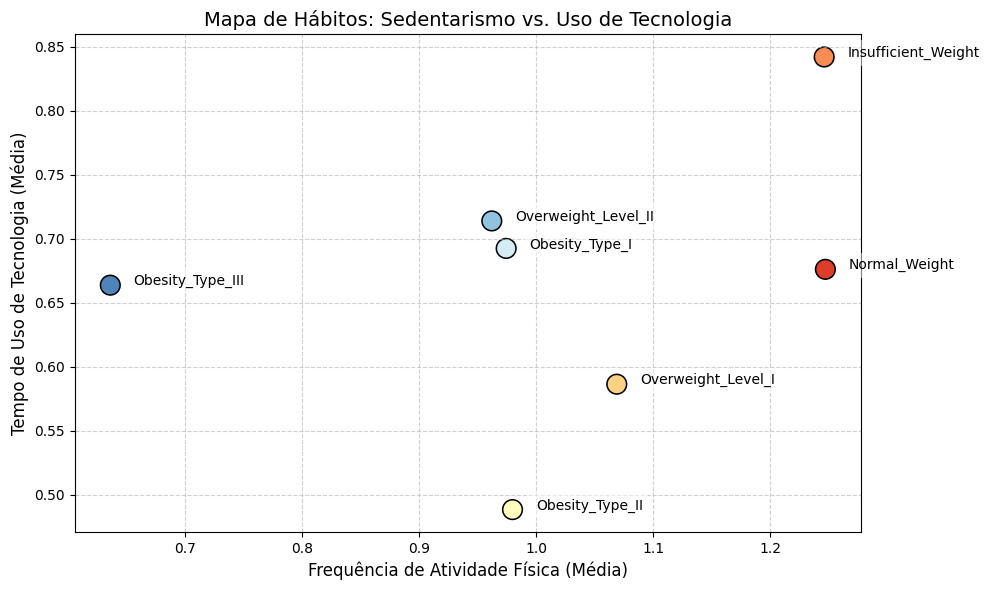

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o gráfico
plt.figure(figsize=(10, 6))

# Plotar os pontos (Scatter)
# Eixo X = Atividade Física (FAF), Eixo Y = Tecnologia (TUE)
sns.scatterplot(
    data=df_agr_faf_tue, 
    x='FAF', 
    y='TUE', 
    hue='Obesity', # Colore cada ponto conforme a categoria
    s=200,         # Tamanho dos pontos
    palette='RdYlBu_r', # Cores variadas
    edgecolor='black'
)

# Adicionar rótulos em cada ponto para saber quem é quem
# Iteramos sobre as linhas do seu df agrupado
for i in range(df_agr_faf_tue.shape[0]):
    plt.text(
        x=df_agr_faf_tue.FAF[i]+0.02, # Posição X (+ um pouquinho p/ direita)
        y=df_agr_faf_tue.TUE[i],      # Posição Y
        s=df_agr_faf_tue.Obesity[i],  # O texto (nome da categoria)
        fontdict=dict(color='black', size=10),
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none') # Fundo branco p/ leitura
    )

# Melhorias visuais
plt.title('Mapa de Hábitos: Sedentarismo vs. Uso de Tecnologia', fontsize=14)
plt.xlabel('Frequência de Atividade Física (Média)', fontsize=12)
plt.ylabel('Tempo de Uso de Tecnologia (Média)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Remover a legenda automática (já colocamos os nomes nos pontos)
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

Entendemos que para combater a obsdd severa a atividade fisica, tem mais importancia do que o uso de telas.

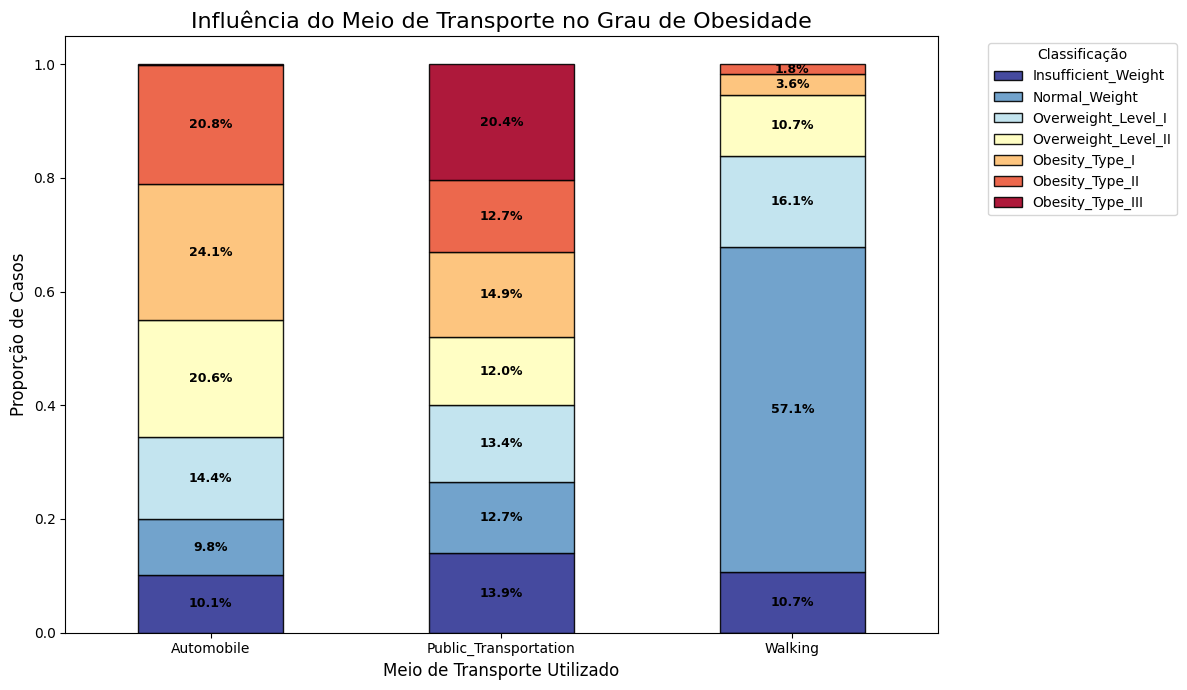

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Tabela Cruzada: Transporte vs Obesidade
# Queremos saber: "Dentre quem usa Carro, como é a obesidade?"
cross_transporte = pd.crosstab(df['MTRANS'], df['Obesity'], normalize='index')

# 2. Reordenar as colunas de obesidade (para o degradê fazer sentido)
ordem_categorias = [
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
]
colunas_existentes = [col for col in ordem_categorias if col in cross_transporte.columns]
cross_transporte = cross_transporte[colunas_existentes]

# 3. Filtrar Transportes irrelevantes (Opcional)
# Às vezes aparecem 'Bike' ou 'Motorbike' com pouquíssimos dados que sujam o gráfico.
# Vamos focar nos principais: Automobile, Public_Transportation, Walking
# Se quiser ver todos, comente a linha abaixo.
principais_meios = ['Automobile', 'Public_Transportation', 'Walking']
cross_transporte = cross_transporte.loc[cross_transporte.index.isin(principais_meios)]

# 4. Plotar
ax = cross_transporte.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 7), 
    colormap='RdYlBu_r', 
    edgecolor='black',
    alpha=0.9
)

plt.title('Influência do Meio de Transporte no Grau de Obesidade', fontsize=16)
plt.ylabel('Proporção de Casos', fontsize=12)
plt.xlabel('Meio de Transporte Utilizado', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Classificação', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar rótulos (apenas para fatias relevantes > 5%)
for n, x in enumerate([*cross_transporte.index.values]):
    for (proportion, y_loc) in zip(cross_transporte.loc[x], cross_transporte.loc[x].cumsum()):
        if proportion > 0.01: 
            plt.text(x=n,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{proportion:.1%}', 
                     color="black",
                     fontsize=9,
                     fontweight="bold",
                     ha="center", 
                     va="center")

plt.tight_layout()
plt.show()

Grande quantidade das pessoas que caminham são pesos normais representando mais da metade do grupo 57%

na primeira coluna vemos que 79% das pessoas que usam o carro es

Note que eles se concentram muito em Overweight Level II, Obesity Type I e Obesity Type II. Eles são consistentemente obesos, mas curiosamente "evoluem" menos para o Tipo III do que o pessoal do transporte público. O carro parece garantir o sobrepeso, mas não necessariamente o extremo da doença.

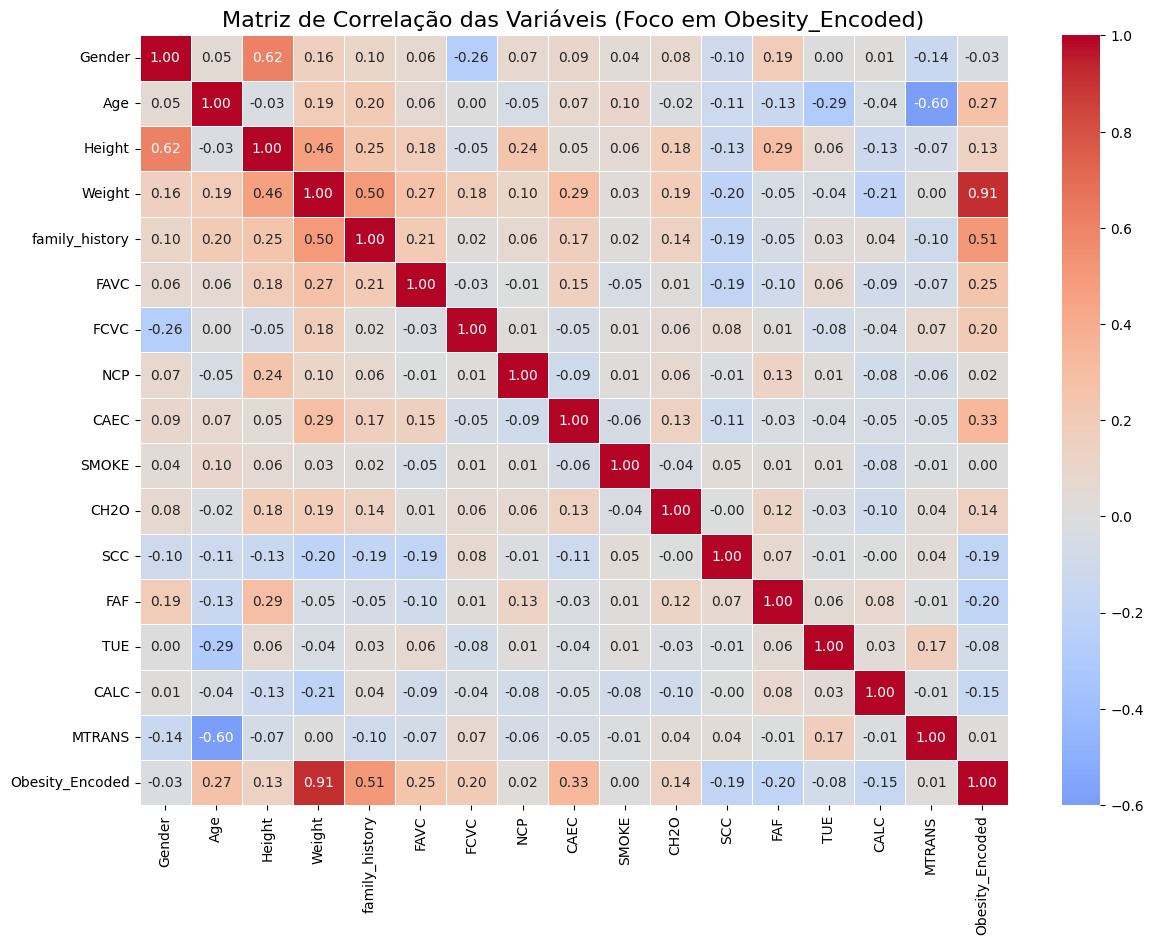

In [24]:
mapa_obesidade = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

df_corr = df.copy()



df_corr['Obesity_Encoded'] = df_corr['Obesity'].map(mapa_obesidade)

le = LabelEncoder()
colunas_categoricas = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


for col in colunas_categoricas:
    
    df_corr[col] = le.fit_transform(df_corr[col])

corr_matrix = df_corr.drop(columns=['Obesity']).corr()


plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix, 
    annot=True,         
    fmt=".2f",          
    cmap='coolwarm',    
    center=0,           
    linewidths=0.5,
    linecolor='white'
)



plt.title('Matriz de Correlação das Variáveis (Foco em Obesity_Encoded)', fontsize=16)
plt.show()











IA:A análise aponta que a Obesidade neste dataset é movida primariamente por fatores hereditários (Histórico Familiar: 0.51), agravada por hábitos de alimentação frequente (Comer entre refeições: 0.33) e idade (0.28). Fatores comportamentais de proteção, como atividade física, exercem influência, mas com menor magnitude estatística. Curiosamente, o consumo de vegetais apresenta correlação positiva, sugerindo um comportamento reativo (dieta) nos graus mais severos de obesidade, e não preventivo.

### Vamos agora codificar as variaveis numéricas

In [25]:
df_corr.drop(columns=['Obesity'],inplace=True)

In [32]:
df['CALC'].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [27]:
df_corr

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_Encoded
0,0,21,1.62,64.00,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21,1.52,56.00,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23,1.80,77.00,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27,1.80,87.00,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,2
4,1,22,1.78,89.80,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.71,131.41,1,1,3.0,3.0,2,0,2.0,0,2.0,1.0,2,3,6
2107,0,21,1.75,133.74,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,2,3,6
2108,0,22,1.75,133.69,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,2,3,6
2109,0,24,1.74,133.35,1,1,3.0,3.0,2,0,3.0,0,1.0,1.0,2,3,6


In [28]:
df_corr['Obesity']=df_corr['Obesity_Encoded']
df_corr.drop(columns=['Obesity_Encoded'],inplace=True)

In [ ]:
#Vamos salvar o dataframe tratado em um novo arquivo csv
df_corr.to_csv('../Data/Obesity_encoded.csv',index=False)

### 